In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# %matplotlib inline Display directly in the notebook instead of opening a seperate window

In [4]:
df=pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
print(df.head())

   Gender   Age  Height  Weight Overweight_family_history High_calorie  \
0  Female  22.0     2.6    64.0                       yes           no   
1  Female  22.0     2.5    56.0                       yes           no   
2    Male  23.0     2.8    77.0                       yes           no   
3    Male  27.0     2.8    87.0                        no           no   
4    Male  22.0     2.8    89.8                        no           no   

   Eat_veggies  Main_meals_count Food_btw_meals Smoke  Water_glass  \
0            2                 3      Sometimes    no            5   
1            3                 3      Sometimes   yes            6   
2            2                 3      Sometimes    no            5   
3            3                 3      Sometimes    no            5   
4            2                 2      Sometimes    no            5   

  Monitoring_calories  Physical_activity  Technology_usage     Alcohol  \
0                  no                  0                 2  

In [5]:
df.tail()

,Gender,Age,Height,Weight,Overweight_family_history,High_calorie,Eat_veggies,Main_meals_count,Food_btw_meals,Smoke,Water_glass,Monitoring_calories,Physical_activity,Technology_usage,Alcohol,Transportation,Obesity_level
2106,Female,22.0,2.7,232.42,yes,yes,3,3,Sometimes,no,5,no,2,4,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22.0,2.7,233.74,yes,yes,3,3,Sometimes,no,5,no,2,4,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23.0,2.8,233.69,yes,yes,3,3,Sometimes,no,5,no,2,4,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.0,2.7,233.35,yes,yes,3,3,Sometimes,no,6,no,2,4,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,NaN,2.7,233.47,yes,yes,3,3,Sometimes,no,6,no,2,4,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
categorical_feature=df.select_dtypes(include=['object']).columns
print(list(categorical_feature))
numerical_feature=df.select_dtypes(include=['int64','float64']).columns
print(list(numerical_feature))

['Gender', 'Overweight_family_history', 'High_calorie', 'Food_btw_meals', 'Smoke', 'Monitoring_calories', 'Alcohol', 'Transportation', 'Obesity_level']
['Age', 'Height', 'Weight', 'Eat_veggies', 'Main_meals_count', 'Water_glass', 'Physical_activity', 'Technology_usage']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     2106 non-null   object 
 1   Age                        2106 non-null   float64
 2   Height                     2111 non-null   float64
 3   Weight                     2111 non-null   float64
 4   Overweight_family_history  2106 non-null   object 
 5   High_calorie               2111 non-null   object 
 6   Eat_veggies                2111 non-null   int64  
 7   Main_meals_count           2111 non-null   int64  
 8   Food_btw_meals             2111 non-null   object 
 9   Smoke                      2111 non-null   object 
 10  Water_glass                2111 non-null   int64  
 11  Monitoring_calories        2111 non-null   object 
 12  Physical_activity          2111 non-null   int64  
 13  Technology_usage           2111 non-null   int64

In [8]:
df.describe()

,Age,Height,Weight,Eat_veggies,Main_meals_count,Water_glass,Physical_activity,Technology_usage
count,2106.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,25.504274,2.703316,96.634424,2.471814,2.837518,5.122691,1.396968,2.889626
std,8.044841,0.100936,68.198424,0.499323,0.526667,0.687472,1.056539,0.732872
min,3.000000,2.000000,23.000000,2.000000,2.000000,4.000000,0.000000,2.000000
25%,22.000000,2.600000,52.305000,2.000000,3.000000,5.000000,0.000000,2.000000
50%,26.000000,2.700000,75.240000,2.000000,3.000000,5.000000,2.000000,3.000000
75%,29.000000,2.800000,92.055000,3.000000,3.000000,6.000000,2.000000,3.000000
max,62.000000,2.900000,273.000000,3.000000,4.000000,7.000000,8.000000,4.000000


In [9]:
df.shape

(2111, 17)

In [10]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Overweight_family_history',
       'High_calorie', 'Eat_veggies', 'Main_meals_count', 'Food_btw_meals',
       'Smoke', 'Water_glass', 'Monitoring_calories', 'Physical_activity',
       'Technology_usage', 'Alcohol', 'Transportation', 'Obesity_level'],
      dtype='object')

In [11]:
df.duplicated().sum()

117

In [12]:
df.isnull().sum()

,0
Gender,5
Age,5
Height,0
Weight,0
Overweight_family_history,5
High_calorie,0
Eat_veggies,0
Main_meals_count,0
Food_btw_meals,0
Smoke,0


In [13]:
df.nunique()

,0
Gender,2
Age,30
Height,6
Weight,1220
Overweight_family_history,2
High_calorie,2
Eat_veggies,2
Main_meals_count,3
Food_btw_meals,4
Smoke,2


In [14]:
df["Age"].value_counts()

,count
Age,
22.0,399
26.0,232
28.0,231
23.0,218
29.0,201
3.0,149
27.0,112
24.0,95
32.0,88


<Axes: >

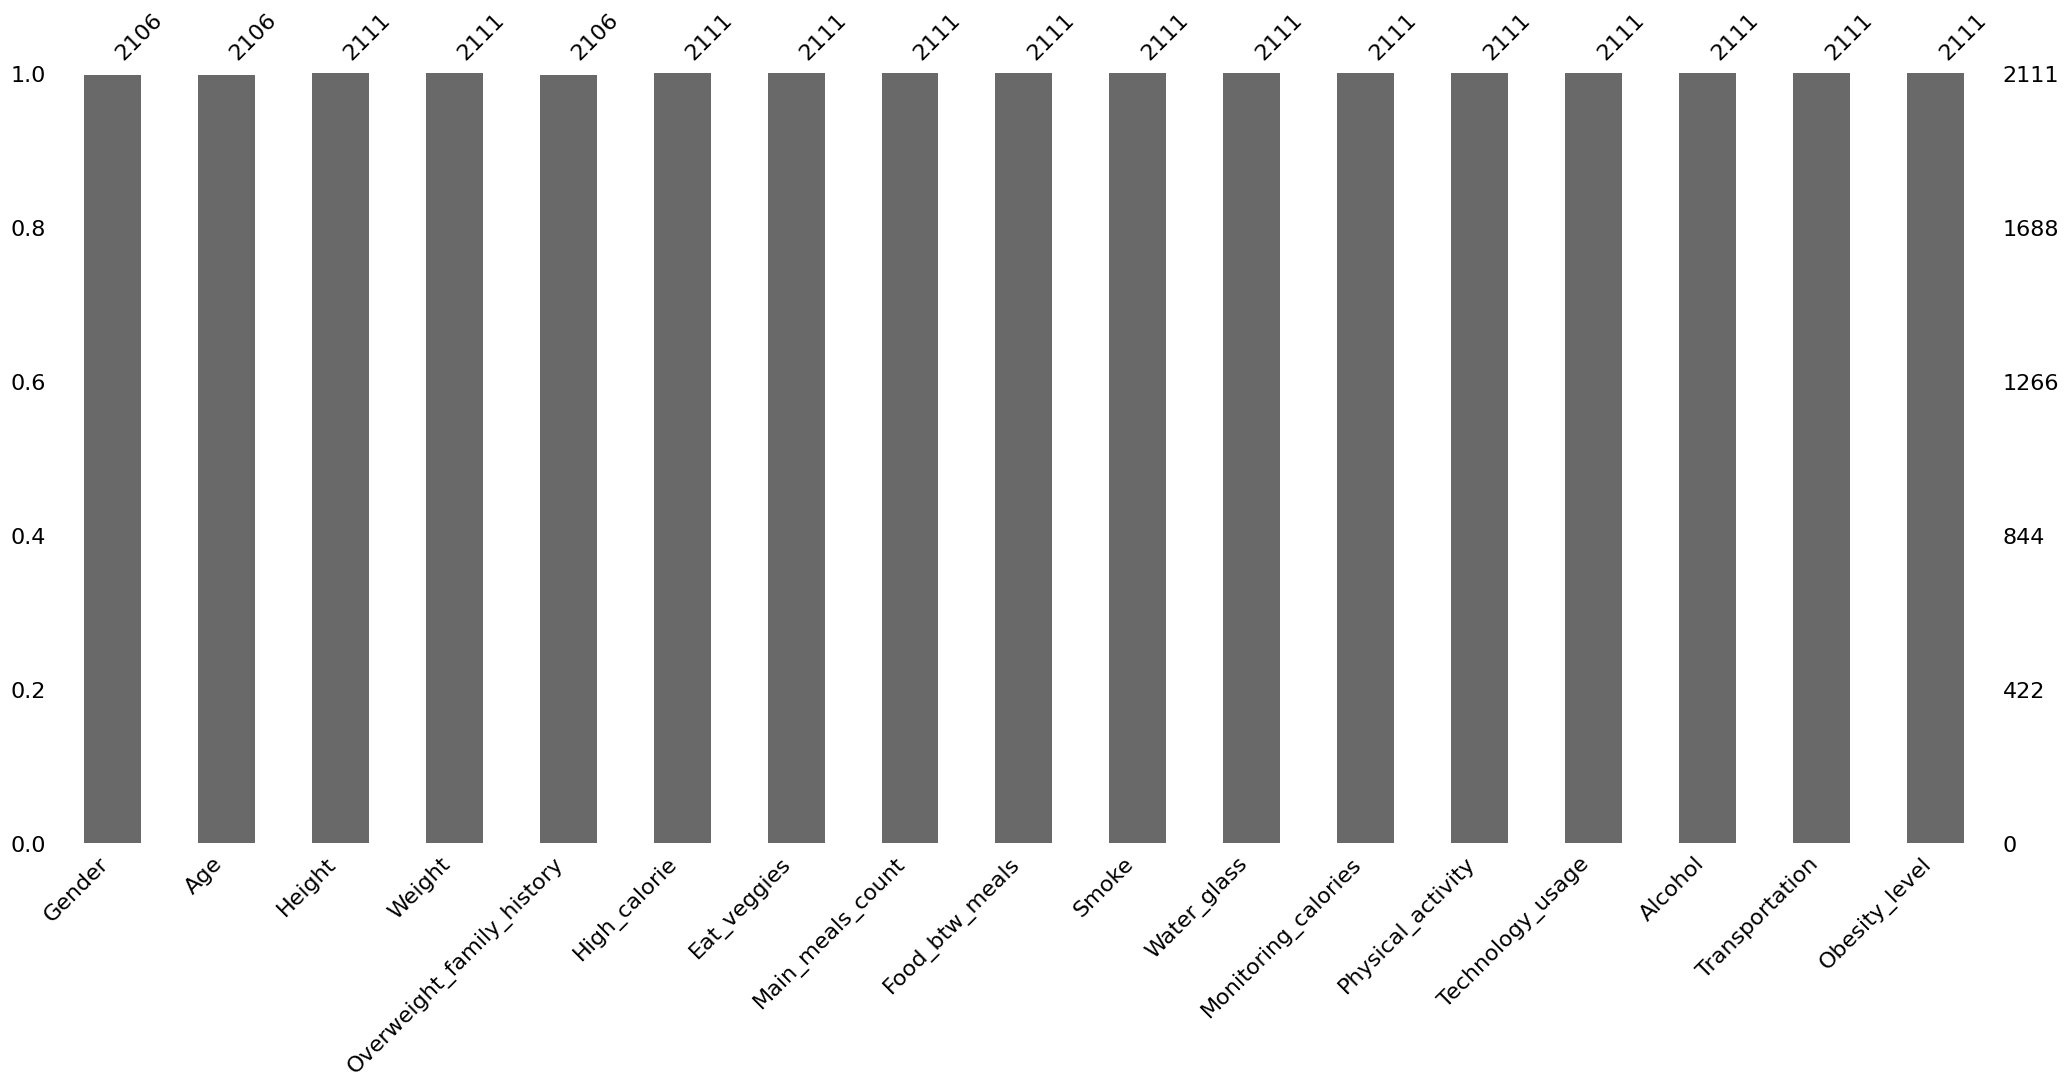

In [15]:
msno.bar(df)

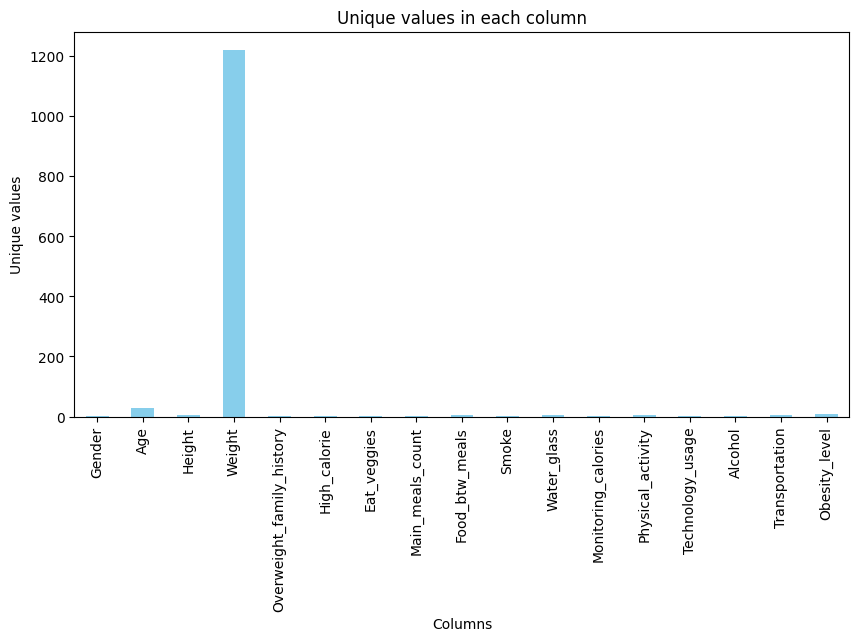

In [16]:
df.nunique().plot(kind="bar",figsize= (10,5),color="skyblue")
plt.xlabel("Columns")
plt.ylabel("Unique values")
plt.title("Unique values in each column")
plt.show()

In [17]:
df.drop_duplicates(inplace=True)
print(df.shape)

(1994, 17)


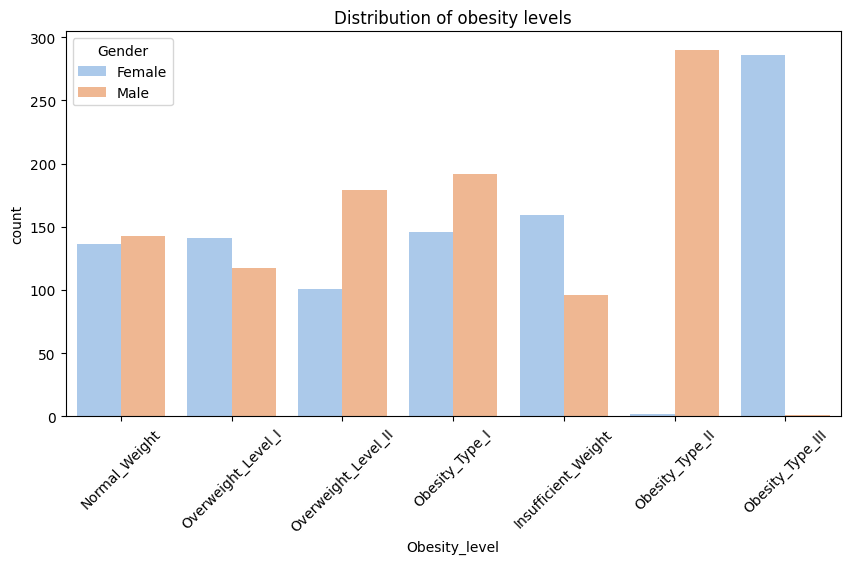

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Obesity_level'],hue='Gender',data=df,palette="pastel")
plt.xticks(rotation=45)
plt.title("Distribution of obesity levels")
plt.show()

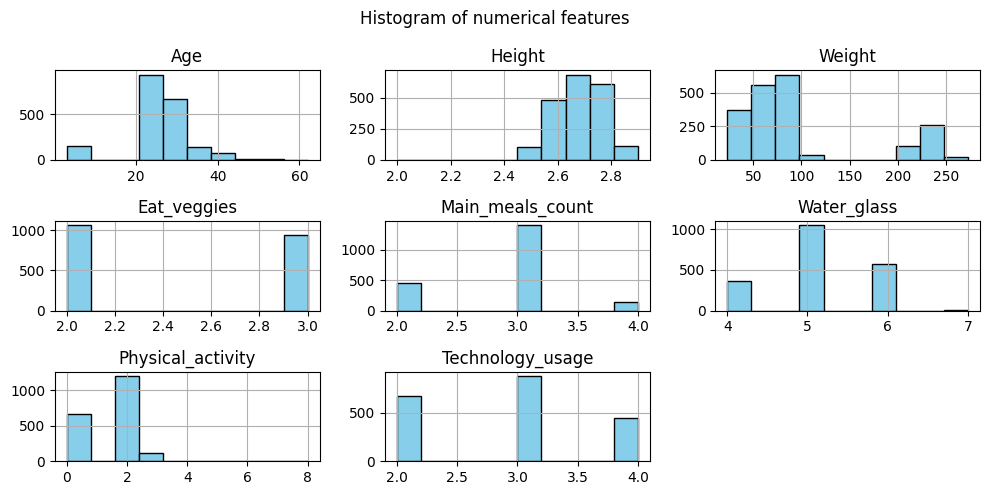

In [19]:
df.hist(figsize=(10,5),bins=10,color="skyblue",edgecolor='black')
plt.suptitle("Histogram of numerical features")
plt.tight_layout()
plt.show()

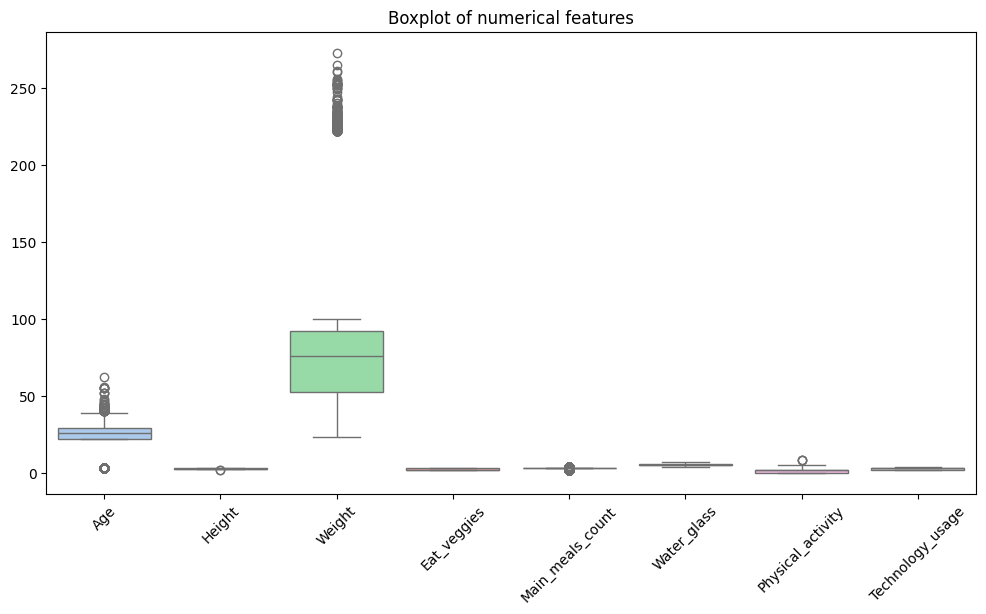

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,palette="pastel",orient="v")
plt.title("Boxplot of numerical features")
plt.xticks(rotation=45)
plt.show()

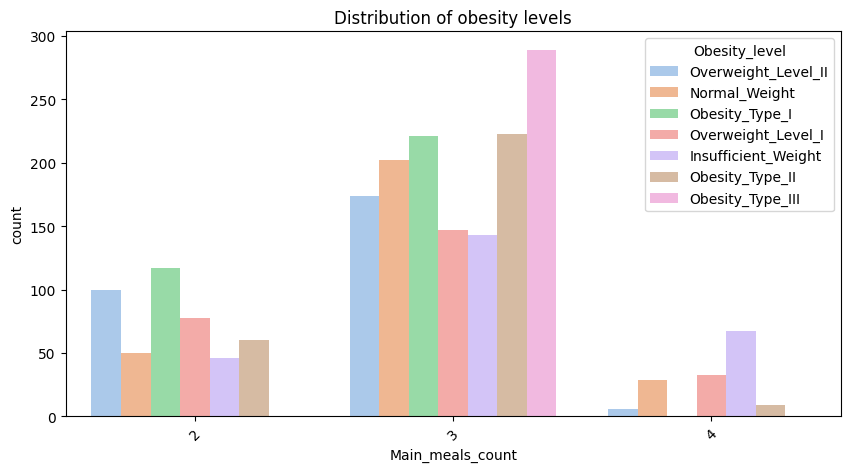

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Main_meals_count'],hue="Obesity_level",data=df,palette="pastel")
plt.xticks(rotation=45)
plt.title("Distribution of obesity levels")
plt.show()


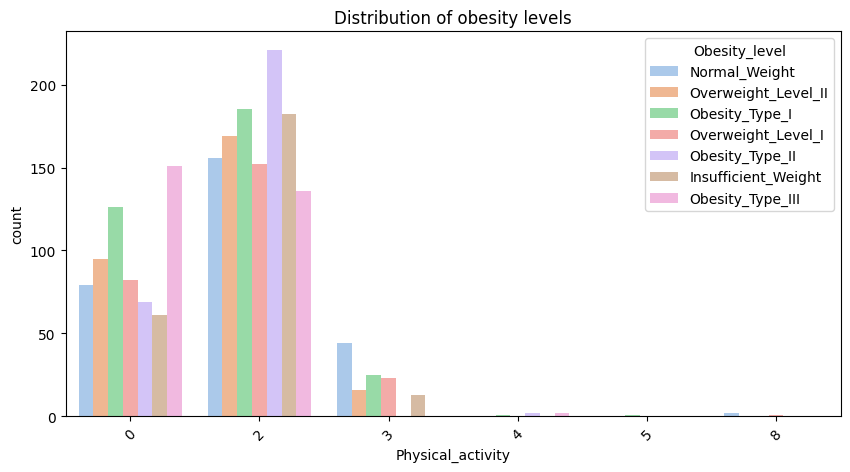

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Physical_activity'],hue="Obesity_level",data=df,palette="pastel")
plt.xticks(rotation=45)
plt.title("Distribution of obesity levels")
plt.show()

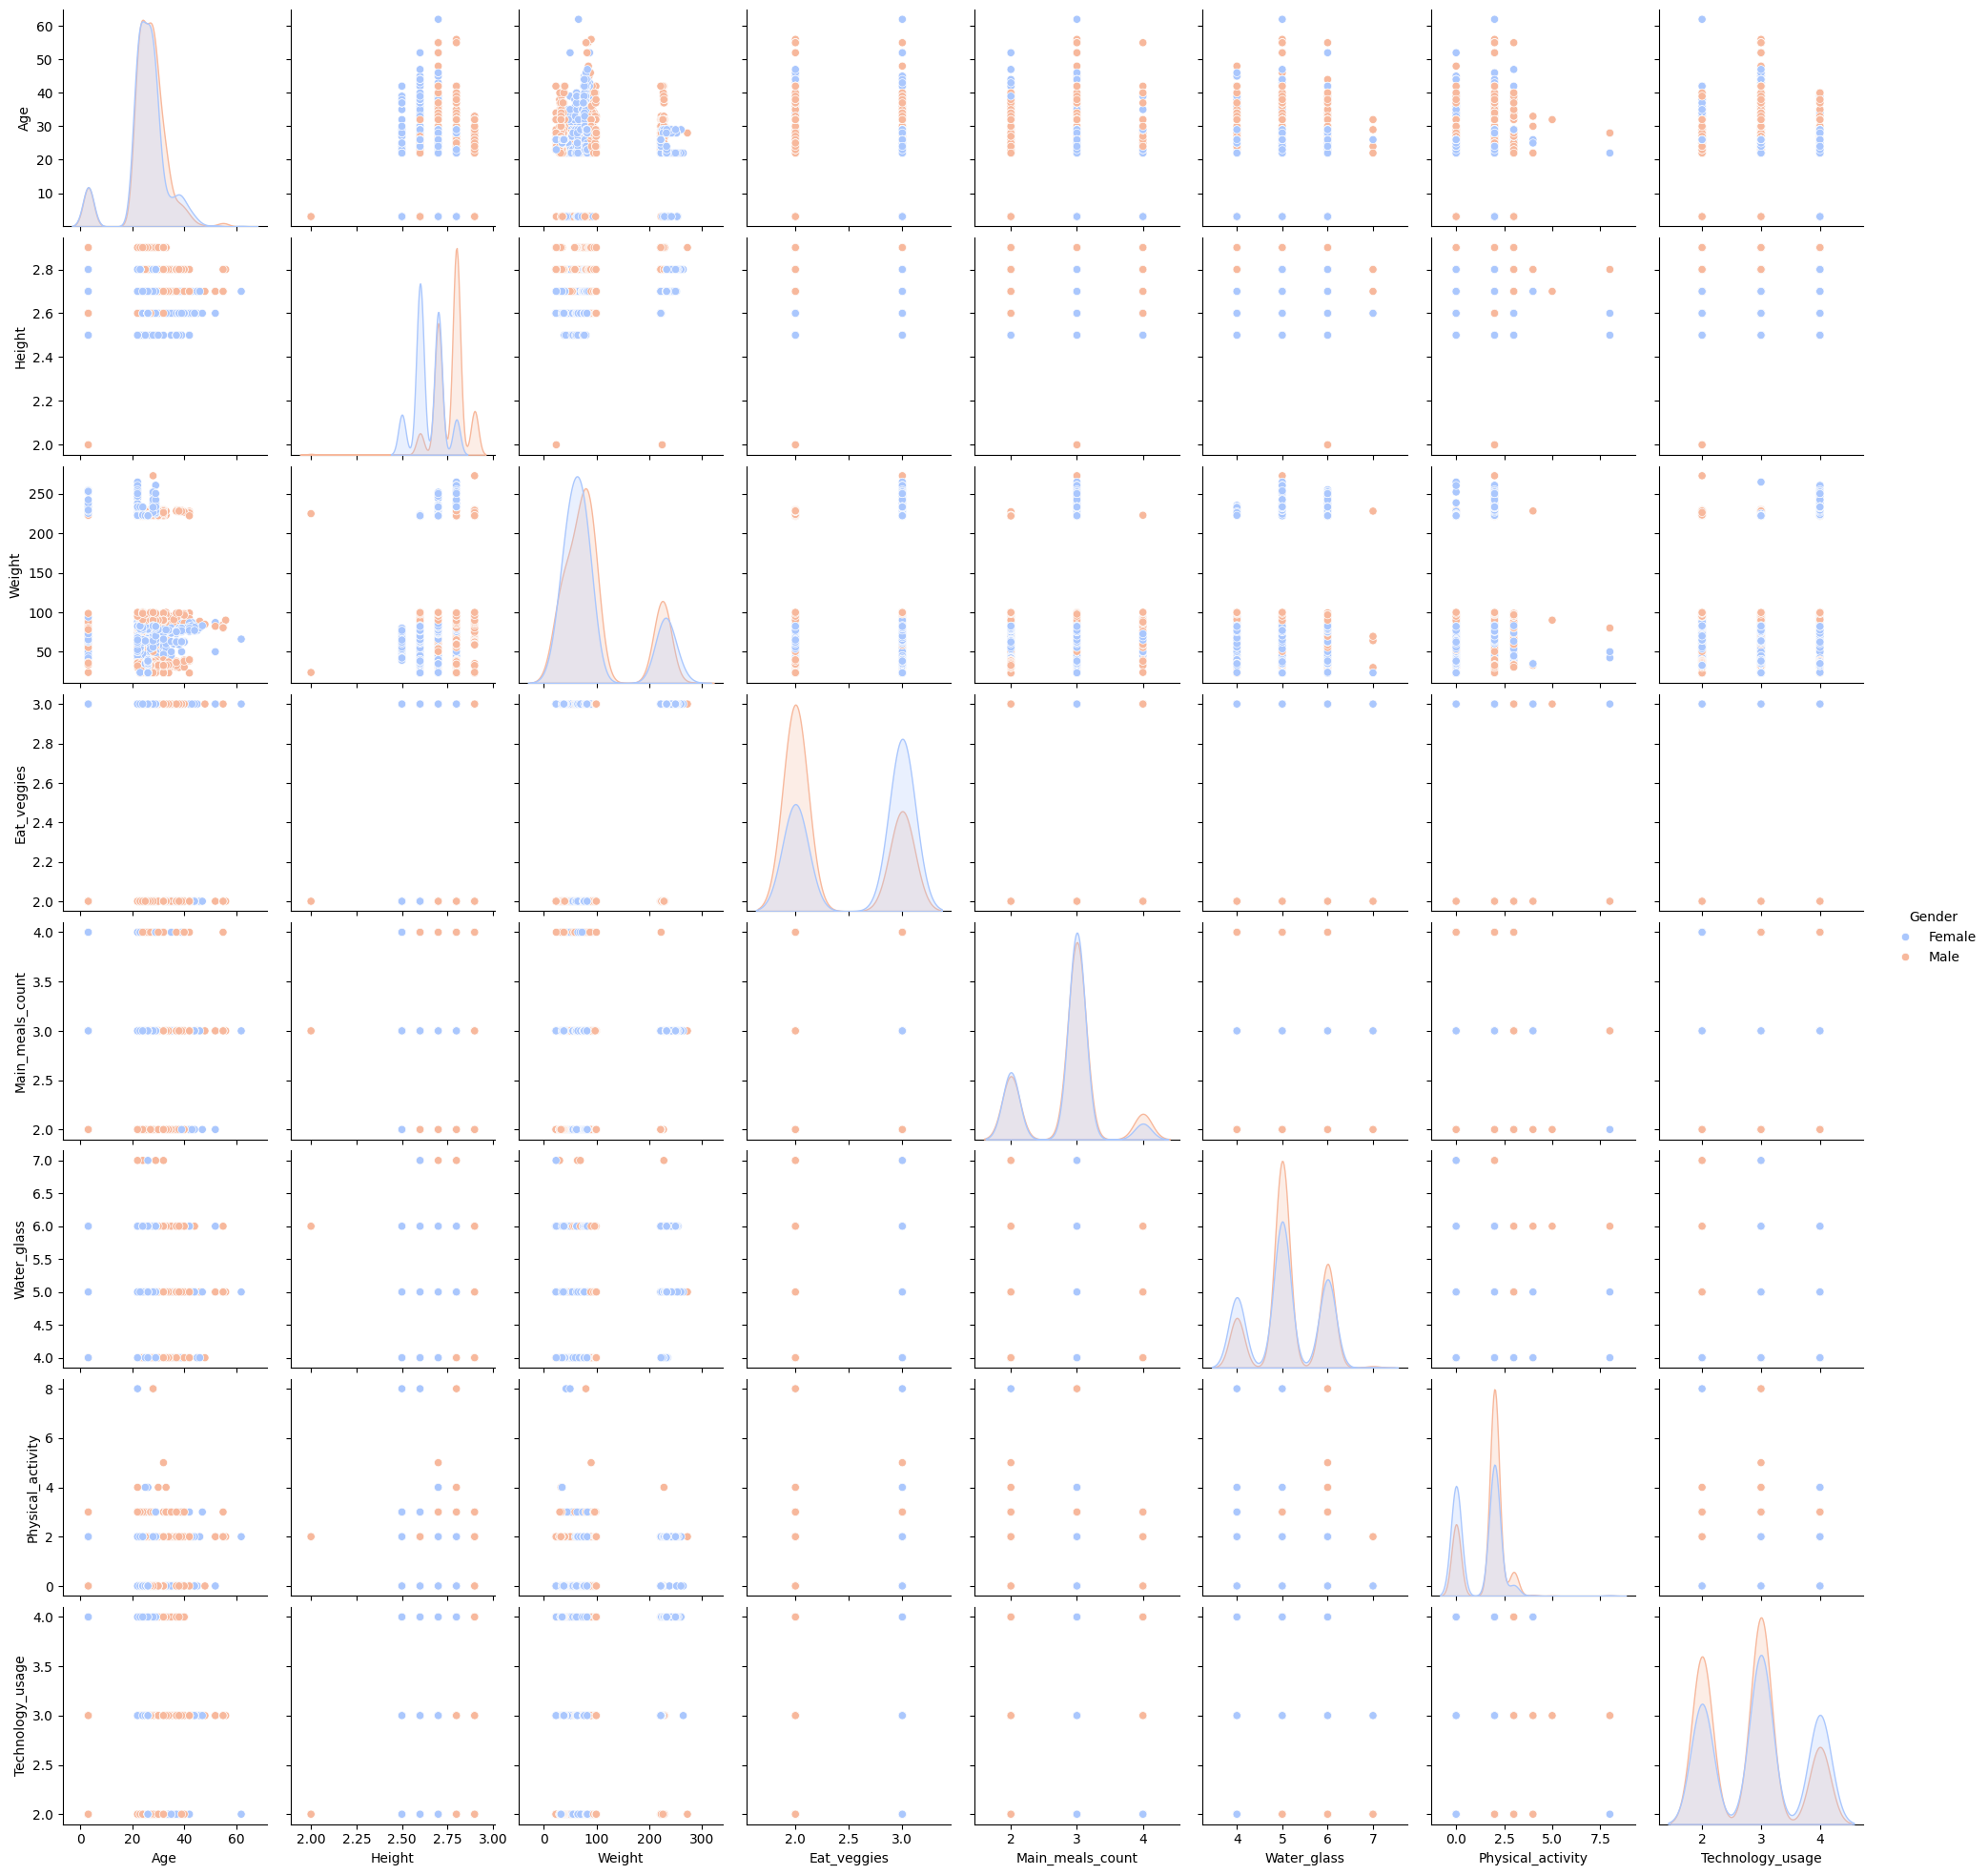

In [23]:
sns.pairplot(df,hue="Gender",diag_kind="kde",palette="coolwarm")
plt.show()

In [24]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df[['Age']]=imputer.fit_transform(df[['Age']])
df.head(389)

,Gender,Age,Height,Weight,Overweight_family_history,High_calorie,Eat_veggies,Main_meals_count,Food_btw_meals,Smoke,Water_glass,Monitoring_calories,Physical_activity,Technology_usage,Alcohol,Transportation,Obesity_level
0,Female,22.0,2.6,64.0,yes,no,2,3,Sometimes,no,5,no,0,2,no,Public_Transportation,Normal_Weight
1,Female,22.0,2.5,56.0,yes,no,3,3,Sometimes,yes,6,yes,3,3,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,2.8,77.0,yes,no,2,3,Sometimes,no,5,no,2,2,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,2.8,87.0,no,no,3,3,Sometimes,no,5,no,2,3,Frequently,Walking,Overweight_Level_I
4,Male,22.0,2.8,89.8,no,no,2,2,Sometimes,no,5,no,0,3,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Female,28.0,2.7,50.0,no,no,2,3,Sometimes,no,5,no,0,2,Sometimes,Walking,Insufficient_Weight
392,Male,28.0,2.8,69.5,no,no,3,3,Frequently,no,6,no,2,2,no,Public_Transportation,Normal_Weight
393,Male,28.0,2.7,78.0,no,yes,2,3,Sometimes,no,5,no,0,2,Sometimes,Public_Transportation,Overweight_Level_II
394,Female,27.0,2.5,55.0,yes,yes,2,3,Sometimes,no,4,no,0,2,no,Public_Transportation,Normal_Weight


In [25]:
# df.drop(columns=['Unnamed: 17'],inplace=True)

In [26]:
df['Gender'].fillna(df['Gender'].interpolate(method='linear'),inplace=True)
df['Overweight_family_history'].fillna(df['Overweight_family_history'].mode().iloc[0],inplace=True)
df['Alcohol'].fillna(df['Alcohol'].mode().iloc[0])
df.isnull().sum()

<ipython-input-26-59e93cefd696>:1: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['Gender'].fillna(df['Gender'].interpolate(method='linear'),inplace=True)
<ipython-input-26-59e93cefd696>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].interpolate(method='linear'),inplace=True)
<ipython-input-26-59e93cefd696>:2: FutureWarning: A value is trying to be set on a copy of a Da

,0
Gender,5
Age,0
Height,0
Weight,0
Overweight_family_history,0
High_calorie,0
Eat_veggies,0
Main_meals_count,0
Food_btw_meals,0
Smoke,0


In [27]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [28]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
df=pd.get_dummies(df,columns=['Food_btw_meals','Alcohol','Transportation'],drop_first=True)
binary_cols=['Gender','Overweight_family_history','High_calorie','Smoke','Monitoring_calories','Obesity_level']
df[binary_cols]=df[binary_cols].astype(str)
le=LabelEncoder()
for col in binary_cols:
  df[col]=le.fit_transform(df[col])
print(df.head())

   Gender   Age  Height  Weight  Overweight_family_history  High_calorie  \
0       0  22.0     2.6    64.0                          1             0   
1       0  22.0     2.5    56.0                          1             0   
2       1  23.0     2.8    77.0                          1             0   
3       1  27.0     2.8    87.0                          0             0   
4       1  22.0     2.8    89.8                          0             0   

   Eat_veggies  Main_meals_count  Smoke  Water_glass  ...  Obesity_level  \
0            2                 3      0            5  ...              1   
1            3                 3      1            6  ...              1   
2            2                 3      0            5  ...              1   
3            3                 3      0            5  ...              5   
4            2                 2      0            5  ...              6   

   Food_btw_meals_Frequently  Food_btw_meals_Sometimes  Food_btw_meals_no  \
0        

In [29]:
df.iloc[:,11:23]=df.iloc[:,11:23].astype(int)
df.head()

<ipython-input-29-763c37435a3b>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0
1       0
2       0
3       0
4       0
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Food_btw_meals_Frequently, Length: 1994, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:,11:23]=df.iloc[:,11:23].astype(int)
<ipython-input-29-763c37435a3b>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       1
1       1
2       1
3       1
4       1
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: Food_btw_meals_Sometimes, Length: 1994, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:,11:23]=df.iloc[:,11:23].astype(int)
<ipython-input-29-763c37435a3b>:1: FutureWarning: Setting an item of incompatible dty

,Gender,Age,Height,Weight,Overweight_family_history,High_calorie,Eat_veggies,Main_meals_count,Smoke,Water_glass,...,Obesity_level,Food_btw_meals_Frequently,Food_btw_meals_Sometimes,Food_btw_meals_no,Alcohol_Sometimes,Alcohol_no,Transportation_Bike,Transportation_Motorbike,Transportation_Public_Transportation,Transportation_Walking
0,0,22.0,2.6,64.0,1,0,2,3,0,5,...,1,0,1,0,0,1,0,0,1,0
1,0,22.0,2.5,56.0,1,0,3,3,1,6,...,1,0,1,0,1,0,0,0,1,0
2,1,23.0,2.8,77.0,1,0,2,3,0,5,...,1,0,1,0,0,0,0,0,1,0
3,1,27.0,2.8,87.0,0,0,3,3,0,5,...,5,0,1,0,0,0,0,0,0,1
4,1,22.0,2.8,89.8,0,0,2,2,0,5,...,6,0,1,0,1,0,0,0,1,0


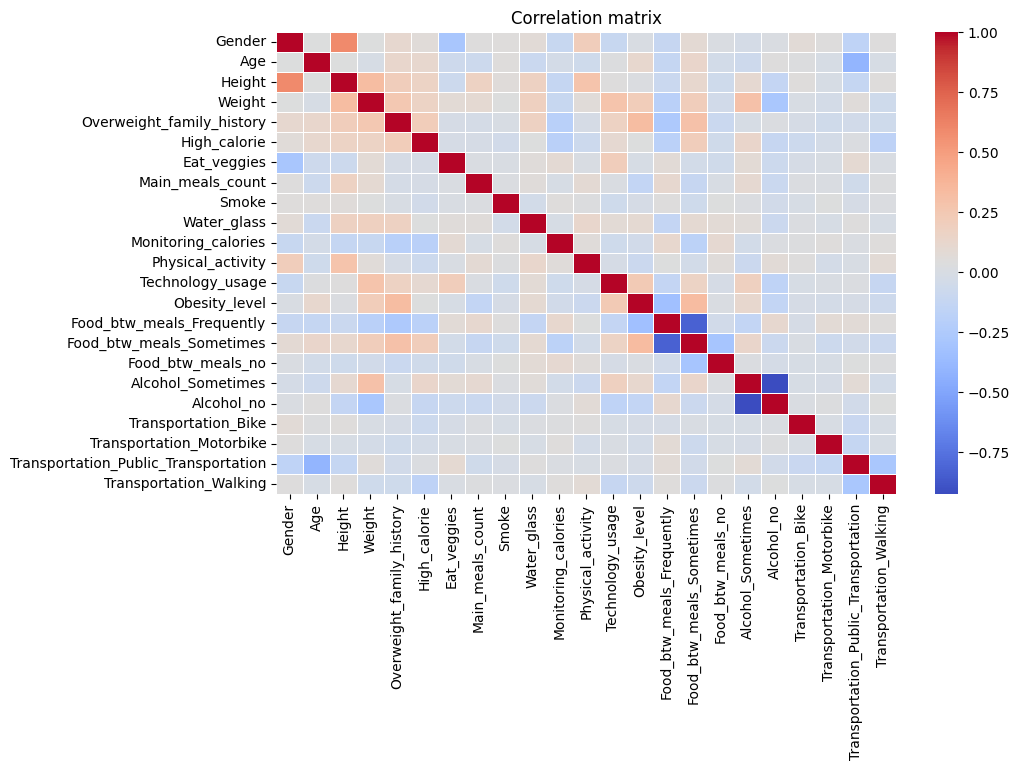

In [30]:
corr_matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=False,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [32]:
df['Obesity_level'].value_counts(normalize=True)

,proportion
Obesity_level,
2,0.169509
3,0.146439
4,0.144935
1,0.140923
6,0.140421
5,0.129388
0,0.128385


In [33]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',random_state=42)
x=df.drop('Obesity_level',axis=1)
y=df['Obesity_level']
x_resampled,y_resampled=smote.fit_resample(x,y)
print(Counter(y_resampled))


Counter({1: 338, 5: 338, 6: 338, 2: 338, 0: 338, 3: 338, 4: 338})


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
print(x_train_scaled[:5])
print(x_test_scaled[:5])

[[ 0.94701802  0.30667858  1.94111857 -0.43872698  0.46842178  0.3699319
   1.0587779   0.2871771  -0.14758357  1.29834021  4.32335032  0.54703732
  -1.20716598  2.72748115 -2.29235729 -0.12618862  0.73455789 -0.67573738
  -0.06639323 -0.07533029 -1.70848439 -0.16843038]
 [-1.03006803  1.06030458 -0.0884351  -0.28709116  0.46842178  0.3699319
   1.0587779  -1.62135402 -0.14758357 -0.15898043 -0.2313021   0.54703732
   1.47635979 -0.36663865  0.43623217 -0.12618862 -1.3613631   1.47986486
  -0.06639323 -0.07533029 -1.70848439 -0.16843038]
 [-1.03006803  0.05546992 -0.0884351  -0.90925045  0.46842178  0.3699319
   1.0587779   0.2871771  -0.14758357  1.29834021 -0.2313021  -1.36220672
   1.47635979 -0.36663865  0.43623217 -0.12618862  0.73455789 -0.67573738
  -0.06639323 -0.07533029  0.5853141  -0.16843038]
 [ 0.94701802 -0.32134308  0.92634174  1.90192296  0.46842178  0.3699319
  -0.94448515  0.2871771  -0.14758357 -0.15898043 -0.2313021   0.54703732
   1.47635979 -0.36663865  0.43623217

In [41]:
dt=DecisionTreeClassifier(max_depth=10,random_state=42)
dt.fit(x_train_scaled ,y_train)
y_pred=dt.predict(x_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification:",classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8521303258145363
Classification:               precision    recall  f1-score   support

           0       0.91      0.96      0.93        51
           1       0.83      0.71      0.77        56
           2       0.87      0.96      0.91        68
           3       0.94      0.83      0.88        58
           4       0.89      0.97      0.93        58
           5       0.68      0.79      0.73        52
           6       0.85      0.73      0.79        56

    accuracy                           0.85       399
   macro avg       0.85      0.85      0.85       399
weighted avg       0.86      0.85      0.85       399

[[49  2  0  0  0  0  0]
 [ 3 40  0  0  0 12  1]
 [ 0  0 65  2  0  0  1]
 [ 0  0  3 48  7  0  0]
 [ 2  0  0  0 56  0  0]
 [ 0  6  0  0  0 41  5]
 [ 0  0  7  1  0  7 41]]


<Axes: >

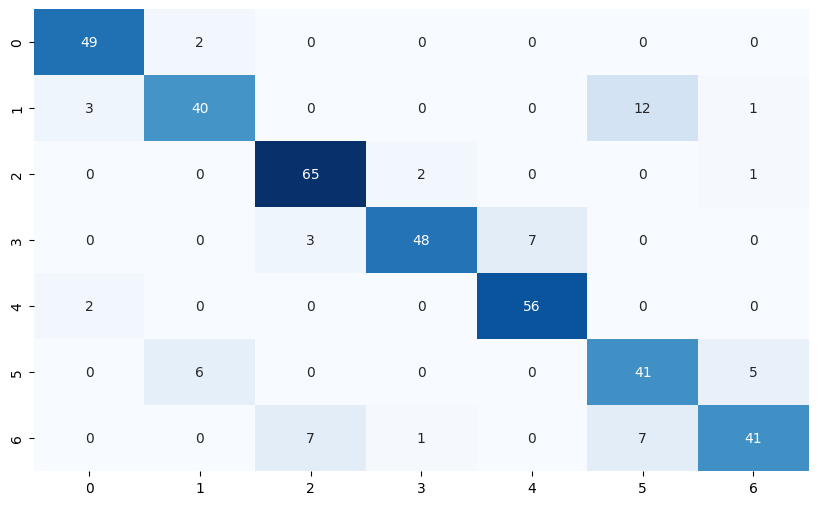

In [42]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)

In [39]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train_scaled,y_train)
y_pred=rf_model.predict(x_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification:",classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.9122807017543859
Classification:               precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.80      0.88      0.84        56
           2       0.91      0.94      0.93        68
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        58
           5       0.82      0.88      0.85        52
           6       0.91      0.71      0.80        56

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.91      0.91      0.91       399

[[49  1  1  0  0  0  0]
 [ 1 49  0  0  0  6  0]
 [ 1  2 64  0  0  0  1]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 58  0  0]
 [ 0  2  1  0  0 46  3]
 [ 0  7  4  1  0  4 40]]


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)
rf_grid.fit(x_train_scaled, y_train)
print("Best Parameters:", rf_grid.best_params_)
best_rf_grid = rf_grid.best_estimator_
y_pred_grid = best_rf_grid.predict(x_test_scaled)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"GridSearch Optimized Random Forest Accuracy: {accuracy_grid:.4f}")
print(confusion_matrix(y_test,y_pred_grid))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
GridSearch Optimized Random Forest Accuracy: 0.9198
[[50  1  0  0  0  0  0]
 [ 3 46  0  0  0  7  0]
 [ 1  2 64  0  0  0  1]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 58  0  0]
 [ 0  1  1  0  0 47  3]
 [ 0  6  3  1  0  2 44]]
